# Pymaceuticals Inc.
---

### Analysis

- It seems within this drug regimen, Capomulin and Ramicane offer the best reduction in Tumor Volume before the total time for the experiment is over. All of the other drugs, while showing some minimal effect against tumor growth, did not compete with the resulting decreased volume Capomulin and Ramicane produced. If there are more experiments to be conducted, the studies should focus on the company's drug of interest, Capomulin, seeing as it did work. For these future experiments, potentially it could be over a longer time frame as to see the full effect of the drug before the toxicity is too much for the animal. This will help us potentially understand the length and amount which can be administered to stop/reduce tumor growth.
 

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [120]:
# Checking the number of mice.
number_of_mice = len(complete_data["Mouse ID"].unique())
number_of_mice

249

In [121]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [122]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = complete_data.loc[complete_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [123]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_complete_data = complete_data[complete_data['Mouse ID'] != 'g989']
clean_complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [124]:
# Checking the number of mice in the clean DataFrame.
clean_num_of_mice = len(clean_complete_data["Mouse ID"].unique())
clean_num_of_mice

248

## Summary Statistics

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tv_mean = clean_complete_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tv_median = clean_complete_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tv_var = clean_complete_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tv_std = clean_complete_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tv_sem = clean_complete_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat_df = pd.DataFrame({"Mean of Tumor Value" : [tv_mean],
                                "Median of Tumor Value" : [tv_median],
                                "Tumor Value Variance" : [tv_var],
                                "Tumor Value Std. Dev." : [tv_std],
                                "Tumor Value Std. Err." : [tv_sem]})
summary_stat_df.head()

,Mean of Tumor Value,Median of Tumor Value,Tumor Value Variance,Tumor Value Std. Dev.,Tumor Value Std. Err.
0,Drug Regimen Capomulin 40.675741 Ceftamin ...,Drug Regimen Capomulin 41.557809 Ceftamin ...,Drug Regimen Capomulin 24.947764 Ceftamin ...,Drug Regimen Capomulin 4.994774 Ceftamin ...,Drug Regimen Capomulin 0.329346 Ceftamin ...


In [126]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_complete_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

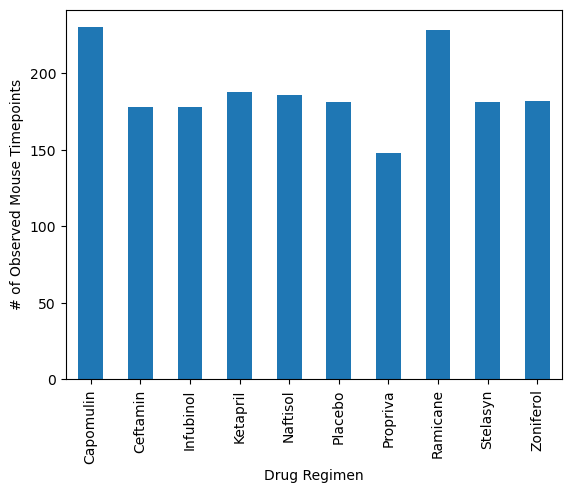

In [127]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_and_mt = clean_complete_data.groupby(['Drug Regimen']).count()['Mouse ID']

drug_and_mt.plot(kind="bar", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

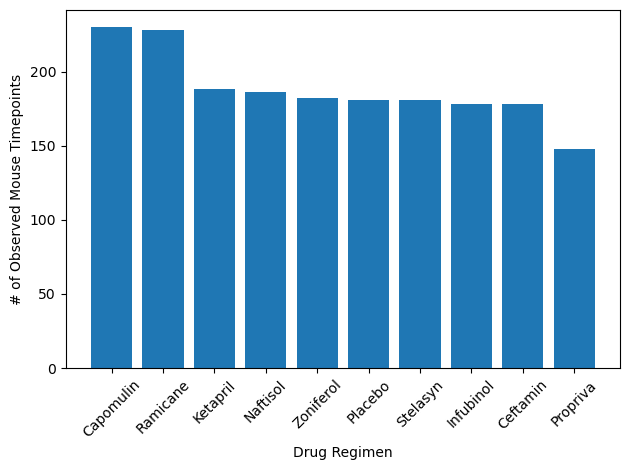

In [228]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
num_drug_reg = clean_complete_data['Drug Regimen'].value_counts()

plt.bar(num_drug_reg.index, num_drug_reg.values, align="center")

plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

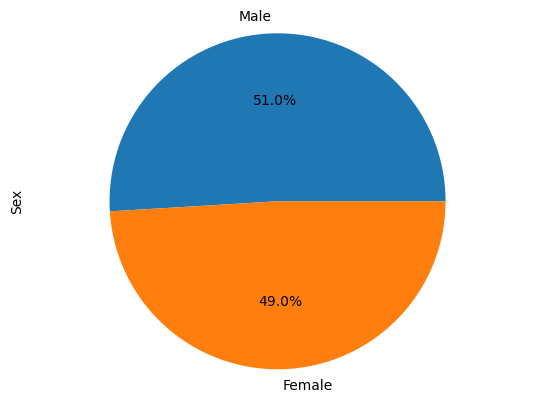

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_complete_data['Sex'].value_counts()

gender.plot(kind="pie", autopct= "%1.1f%%")
plt.axis("equal")
plt.show()

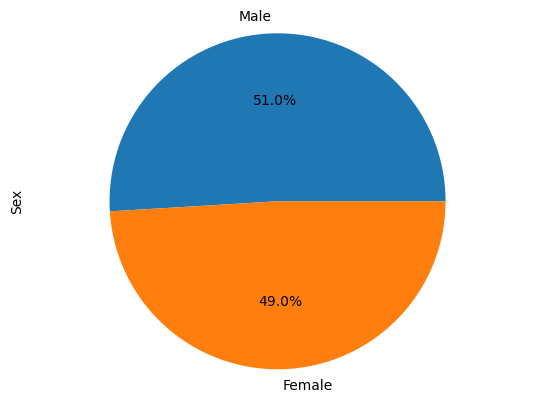

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

plt.pie(gender, labels=labels, autopct= "%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [190]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimen = clean_complete_data.loc[(clean_complete_data["Drug Regimen"] == "Capomulin") | 
                                    (clean_complete_data["Drug Regimen"] == "Ramicane") | 
                                    (clean_complete_data["Drug Regimen"] == "Infubinol") |
                                    (clean_complete_data["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_regimen.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(last_timepoint, clean_complete_data, on=['Mouse ID', 'Timepoint'])
final_tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [202]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = clean_complete_data.loc[clean_complete_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{drug}'s potential outliers: {tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)].values}")


Capomulin's potential outliers: [25.47214326 23.34359787]
Ramicane's potential outliers: [22.05012627]
Infubinol's potential outliers: []
Ceftamin's potential outliers: []


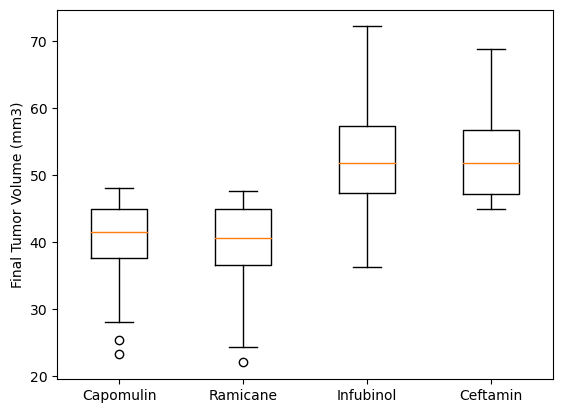

In [210]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_distr = [four_regimen.loc[four_regimen['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] for drug in drug_regimen]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

plt.boxplot(tumor_distr, labels=labels)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

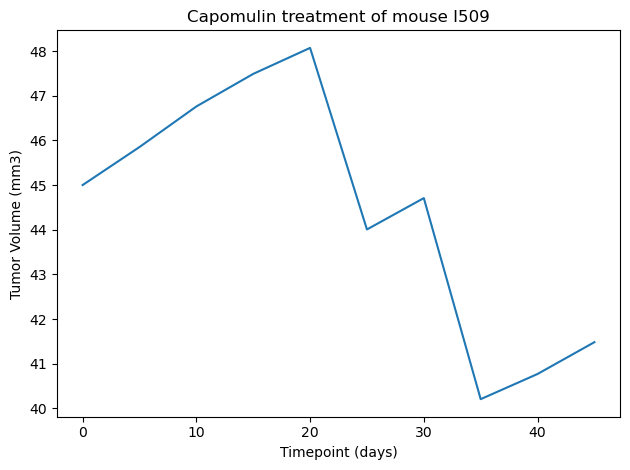

In [213]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = 'l509'
capomulin_mouse = clean_complete_data[(clean_complete_data['Drug Regimen'] == 'Capomulin') & (clean_complete_data['Mouse ID'] == single_mouse)]


plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
plt.tight_layout()
plt.show()

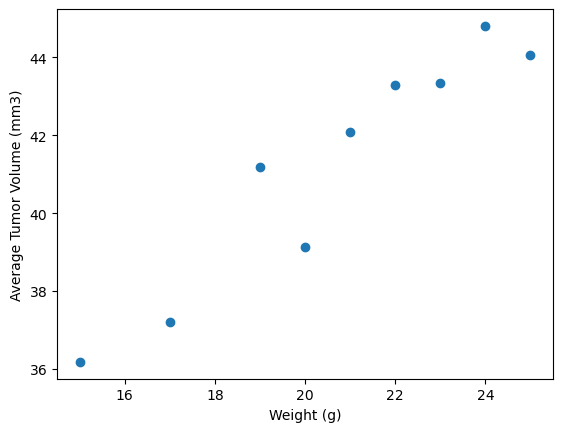

In [221]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_complete_data[(clean_complete_data['Drug Regimen'] == 'Capomulin')]

avg_tumor_vol = capomulin_regimen.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol ['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.9034966277438602


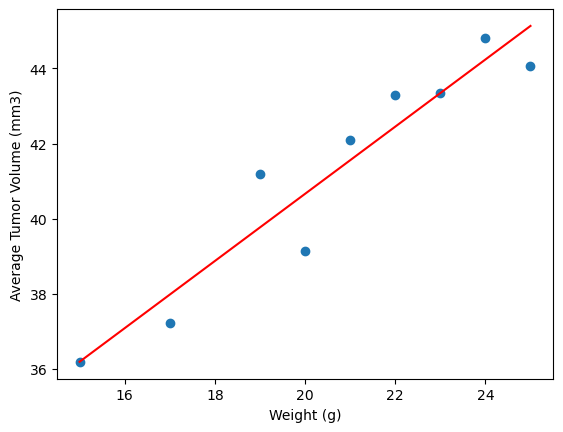

In [225]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#import again to fit my syntax needs
from scipy.stats import linregress

capomulin_regimen = clean_complete_data[(clean_complete_data['Drug Regimen'] == 'Capomulin')]
avg_tumor_vol = capomulin_regimen.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

x_values = avg_tumor_vol['Weight (g)']
y_values = avg_tumor_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}")
plt.show()